### <center> Image Denoising using Shearlets </center>

In [10]:
# Clone the libraris
#Pkg.clone("https://github.com/arsenal9971/Shearlab.jl.git")

In [1]:
# Loard the Pkg
#push!(LOAD_PATH,pwd()*"/../../src") 
#import Shearlab
using Shearlab
using PyPlot
#reload("Shearlab")

In [14]:
# Read Data
n = 512;
# The path of the image
name = "../../data_samples/lena.jpg";
data = Shearlab.load_image(name, n);
#Rescale image in [0,1] summing the 3 arrays in the RGB format
#data = Shearlab.rescale(sum(data,3)); this time no rescaling ; 

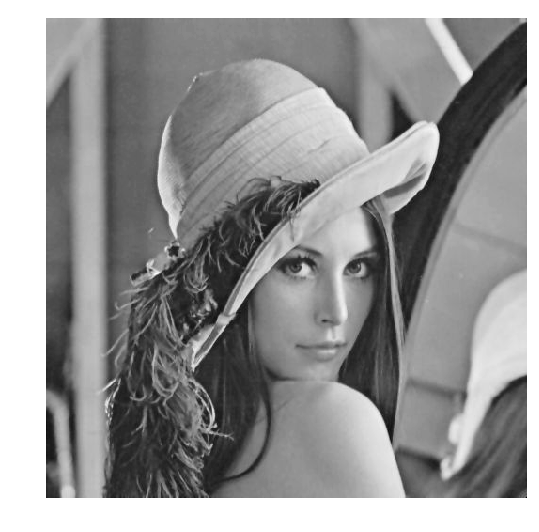

In [3]:
# Reduce one dimension 
data = data[:,:,1];
Shearlab.imageplot(data);

In [4]:
# settings
sigma = 30;
scales = 5;
thresholdingFactor = 3;

In [5]:
# Give noise to data
X = data;
Xnoisy = X + sigma*randn(size(X));

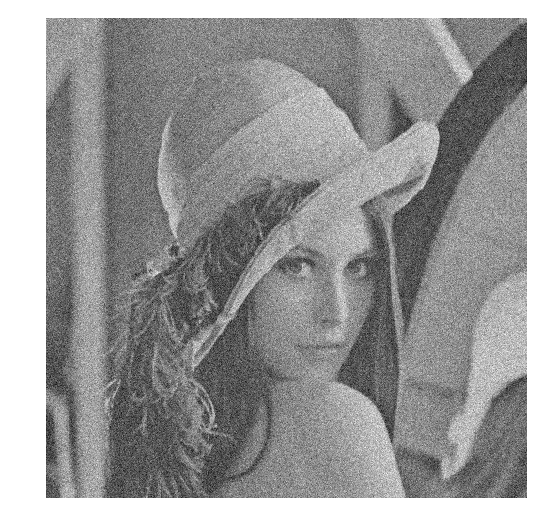

In [6]:
Shearlab.imageplot(Xnoisy);

In [7]:
maximum(X)

242.0

In [8]:
# Get the Shearlet system 
shearletSystem = Shearlab.getshearletsystem2D(size(X,1), size(X,2), scales);

In [9]:
# Decomposition
coeffs = Shearlab.sheardec2D( Xnoisy, shearletSystem);

In [10]:
# Thresholding
coeffs = coeffs.*(abs(coeffs).> thresholdingFactor*reshape(repmat(shearletSystem.RMS',size(X,1)*size(X,2), 1),
        size(X,1),size(X,2),length(shearletSystem.RMS))*sigma);

In [11]:
# Reconstruction
Xrec = Shearlab.shearrec2D(coeffs, shearletSystem);

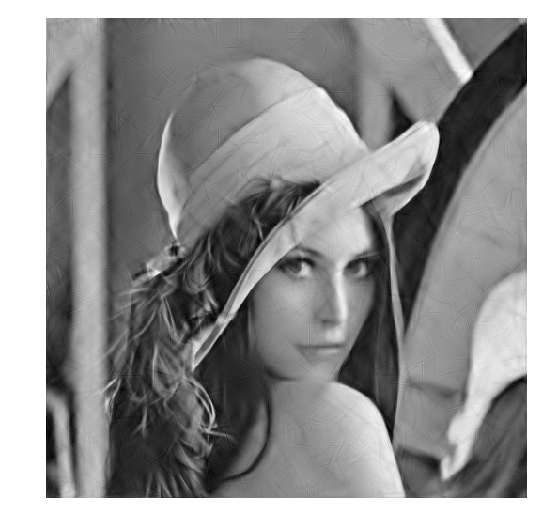

In [12]:
Shearlab.imageplot(Xrec);

In [13]:
SNR = Shearlab.snr(X,Xrec)

25.83412072486736